# kNN for classification exercise

In [2]:
!pip install mglearn
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
import scipy as scipy

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.1 MB/s eta 0:00:00


# Getting the data

In [4]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

The keys of the object are:

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Let's get a bit acquainted with the data

In [6]:
print(data['DESCR'][:1300])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

With the California housing data set, we want to predict the median house value for California districts, so we basically have a regression problem. For this exercise we will transform the regression problem to a classification problem by making the target variable binary.

### Transforming the data

First consider the empirical distribution to the target

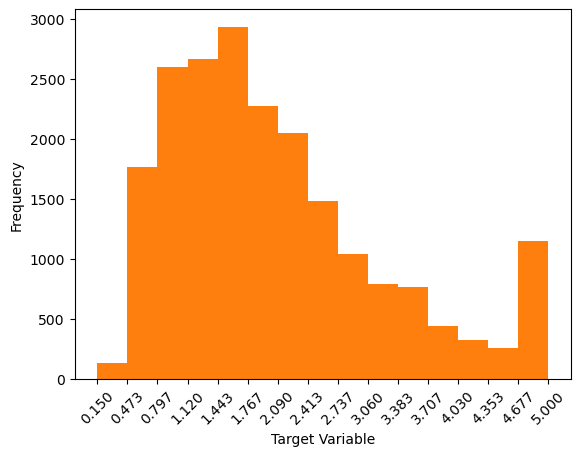

In [10]:
counts, bin_edges, _ = plt.hist(data['target'], bins=15)
plt.xlabel("Target Variable")
plt.xticks(bin_edges, rotation=45)
plt.ylabel("Frequency")
plt.show()

We transform the price prediction into a classification problem, where we try to predict whether the price is below (0) (KEEL note: or equal to) and above (1) the median house price. We call this new target variable `c`.

In [8]:
c = np.array([1 if y > np.median(data['target']) else 0 for y in data['target']])

We now divide the data into a training set and a test set. Remember, the latter represents our future unseen examples

In [9]:
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)
print("Number of data points in training set and test set, respectively: {} and {}".format(X_train.shape[0], 
                                                                                          X_test.shape[0]))

Number of data points in training set and test set, respectively: 15480 and 5160


Next we 'learn' a model with the data

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, c_train)
print("Model accuracy on the test data: {}".format(knn.score(X_test,c_test)))
print("Model accuracy on the train data: {}".format(knn.score(X_train,c_train)))

Model accuracy on the test data: 0.6162790697674418
Model accuracy on the train data: 0.81156330749354


In [14]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, c_train)
print("Model accuracy on the test data: {}".format(knn5.score(X_test,c_test)))
print("Model accuracy on the train data: {}".format(knn5.score(X_train,c_train)))

Model accuracy on the test data: 0.6145348837209302
Model accuracy on the train data: 0.7627906976744186


In [15]:
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train, c_train)
print("Model accuracy on the test data: {}".format(knn9.score(X_test,c_test)))
print("Model accuracy on the train data: {}".format(knn9.score(X_train,c_train)))

Model accuracy on the test data: 0.6168604651162791
Model accuracy on the train data: 0.7184754521963824


In [17]:
knn1= KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, c_train)
print("Model accuracy on the test data: {}".format(knn1.score(X_test,c_test)))
print("Model accuracy on the train data: {}".format(knn1.score(X_train,c_train)))

Model accuracy on the test data: 0.6224806201550388
Model accuracy on the train data: 1.0


### *Exercise:*

* What is the performance of the model on the training set and test set, respectively?
* Try changing the number of nearest neighbors and consider the effect on classification accuracy on both the training set and test set